# Predicting GH Hiplife Hits  Logistic Regression


### Import relevant libraries 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Load Dataset 

In [2]:
df = pd.read_csv('gh_songs.csv')
features = df.drop('explicit',1).columns
features

Index(['album_', 'artists_', 'track_name', 'release_year', 'release_month',
       'duration_min', 'popularity', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'status'],
      dtype='object')

In [3]:
# replace the hit with 1 and non hits with 0
# for modeling purposes
df["status"].replace({"hit": "1", "non_hit": "0"}, inplace=True)


In [4]:
# replace the Trues with 1 and Falses with 0 
# for modeling purposes
df["explicit"].replace({True: "1", False: "0"}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 21 columns):
album_              1297 non-null object
artists_            1297 non-null object
track_name          1297 non-null object
release_year        1297 non-null int64
release_month       1297 non-null object
duration_min        1297 non-null float64
explicit            1297 non-null object
popularity          1297 non-null int64
key                 1297 non-null int64
mode                1297 non-null int64
time_signature      1297 non-null int64
acousticness        1297 non-null float64
danceability        1297 non-null float64
energy              1297 non-null float64
instrumentalness    1297 non-null float64
liveness            1297 non-null float64
loudness            1297 non-null float64
speechiness         1297 non-null float64
valence             1297 non-null float64
tempo               1297 non-null float64
status              1297 non-null object
dtypes: float64(10), int64(

## Data Exploration and Visualizations 

#### Danceability  

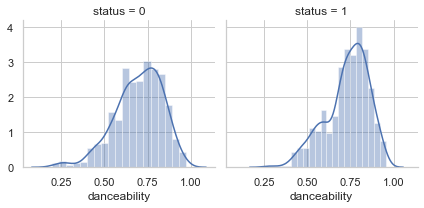

In [6]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "danceability")
plt.savefig('danceability')

# Danceability - describes how suitable a track is for dancing based 
# on a combination of musical elements including tempo, rhythm stability, 
# beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [7]:
# The above visualization shows the distribution of danceability for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for danceability of hit songs = 0.7324
# The average score for danceabiltity of non hit songs = 0.697

#### Acousticness 

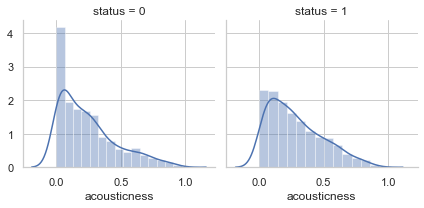

In [8]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "acousticness")
plt.savefig('acousticness')

# A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
# 1.0 represents high confidence the track is acoustic. 

In [9]:
# The above visualization shows the distribution of acousticness for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for acousticness of hit songs = 0.2838
# The average score for acousticness of non hit songs = 0.245

#### Energy 

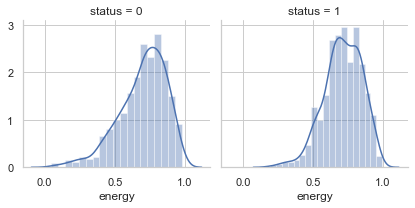

In [10]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "energy")
plt.savefig('energy')

#Energy is a measure from 0.0 to 1.0 and represents a perceptual 
# measure of intensity and activity. Typically, energetic tracks feel fast, 
# loud, and noisy. For example, death metal has high energy, 
# while a Bach prelude scores low on the scale. Perceptual features contributing 
#to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [11]:
# The above visualization shows the distribution of energy for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for energy of hit songs = 0.7146
# The average score for enrgy of non hit songs = 0.699

#### Liveness 

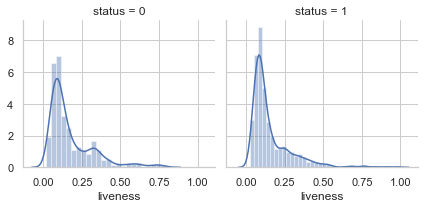

In [12]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "liveness")
plt.savefig('liveness')

# Detects the presence of an audience in the recording. 
# Higher liveness values represent an increased probability that the track was performed live. 
# A value above 0.8 provides strong likelihood that the track is live.

In [13]:
# The above visualization shows the distribution of liveness for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for energy of hit songs = 0.1558
# The average score for energy of non hit songs =  0.1768

#### Loudness 

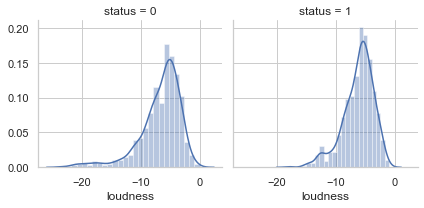

In [14]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "loudness")
plt.savefig('loudness')

# The overall loudness of a track in decibels (dB). 
# Loudness values are averaged across the entire track and are useful for 
# comparing relative loudness of tracks. Loudness is the quality of a sound 
# that is the primary psychological correlate of physical strength (amplitude). 

In [15]:
# The above visualization shows the distribution of loudness for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for loudness of hit songs = -6.2245
# The average score for loudness of non hit songs = -6.742

#### Speechiness 

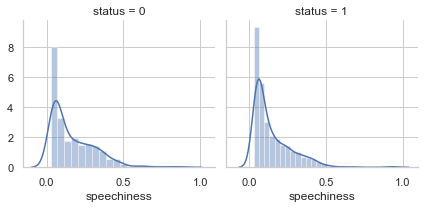

In [16]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "speechiness")
plt.savefig('speechiness')

# Speechiness detects the presence of spoken words in a track. 
# The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), 
# the closer to 1.0 the attribute value. Values above 0.66 describe tracks 
# that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe 
# tracks that may contain both music and speech, either in sections or layered, including 
# such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [17]:
# The above visualization shows the distribution of speechiness for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for speechiness of hit songs = 0.14559
# The average score for speechiness of non hit songs = 0.1675

#### Valence 

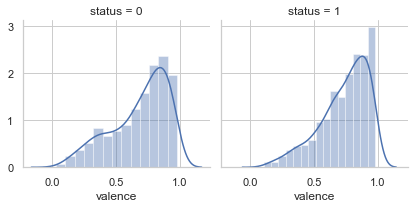

In [18]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "valence")
plt.savefig('valence')

# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), 
# while tracks with low valence sound more negative (e.g. sad, depressed, angry)

In [19]:
# The above visualization shows the distribution of valence for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for valence of hit songs = 0.7344
# The average score for valence of non hit songs =  0.684

#### Tempo 

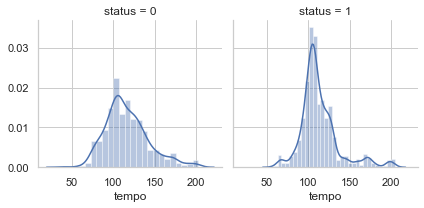

In [20]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "tempo")
plt.savefig('tempo')

# The overall estimated tempo of a track in beats per minute (BPM). 
# In musical terminology, tempo is the speed or pace of a given piece and derives 
# directly from the average beat duration.

In [21]:
# The above visualization shows the distribution of tempo for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for tempo of hit songs = 113.327
# The average score for tempo of non hit songs =  116.808

#### Duration (minutes) 

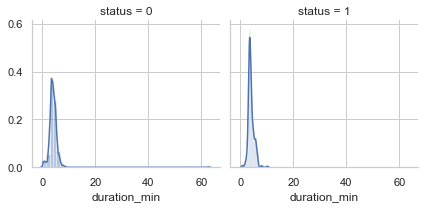

In [22]:
g = sns.FacetGrid(df, col ="status", palette="Set1")
g = g.map(sns.distplot, "duration_min")
plt.savefig('duration_min')

# The duration of the track in minutes 

In [23]:
# The above visualization shows the distribution of duration for both 
# hit songs and non hit songs. 1 = hit songs and 0 = non hit songs
# The average score for duration of hit songs = 3.991 minutes
# The average score for duration of non hit songs =  4.09 minutes

#### .

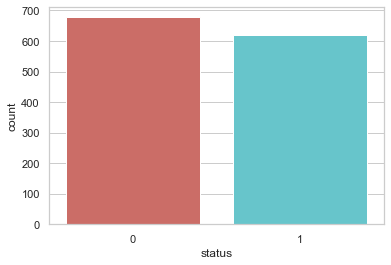

<Figure size 432x288 with 0 Axes>

In [24]:
# The plot below shows the proportion of hit songs to non hit songs
# Because it is almost balanced (52:47), I did not make any changes to it
sns.countplot(x='status', data=df, palette='hls')
plt.show()
plt.savefig('count_plot_status')

In [25]:
count_of_hit = (df['status']=='1').sum()
count_non_hit = (df['status']=='0').sum()
pct_of_non_hit = count_non_hit/(count_non_hit+count_of_hit)
print("percentage of non hit songs is", pct_of_non_hit*100)
pct_of_hit = count_of_hit/(count_non_hit+count_of_hit)
print("percentage of hit songs", pct_of_hit*100)

percentage of non hit songs is 52.27447956823439
percentage of hit songs 47.72552043176561


## Implementing the Model 

In [26]:
cols = ['duration_min', 'explicit', 'key', 'mode',
       'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo']
X = df[cols]
y = df['status']

In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary2())

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Optimization terminated successfully.
         Current function value: 0.654357
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: status           AIC:              1725.4026 
Date:               2020-05-27 13:12 BIC:              1797.7519 
No. Observations:   1297             Log-Likelihood:   -848.70   
Df Model:           13               LL-Null:          -897.67   
Df Residuals:       1283             LLR p-value:      4.1613e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
duration_min      -0.0349   0.0531 -0.6575 0.5109 -0.1390  0.0692
explicit           0.2761   0.1786  1.5458 0.1222 -0.0740  0.6262


In [28]:
# the p values for the features which are greater than 0.05 will be removed. 
# the features removed are duration, explicit, key, mode, time signature and energy

In [29]:
cols = ['acousticness', 'danceability',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo']
X = df[cols]
y = df['status']

In [30]:
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.656415
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.052     
Dependent Variable: status           AIC:              1718.7406 
Date:               2020-05-27 13:12 BIC:              1760.0830 
No. Observations:   1297             Log-Likelihood:   -851.37   
Df Model:           7                LL-Null:          -897.67   
Df Residuals:       1289             LLR p-value:      3.6177e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
acousticness       1.0912   0.2716  4.0174 0.0001  0.5588  1.6236
danceability       1.0714   0.3673  2.9167 0.0035  0.3514  1.7913


In [31]:
# From the above table, all the features selected have a p value less than 0.05
# Meaning they are significant enough to be used in modeling 

### Logistic Regression Model fitting 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[88 60]
 [33 79]]


In [35]:
# The above confusion matrix shows that 79 of the songs were hits and the model predicted a hit
# Again, 88 of the songs were non hits and the model predicted a non hit
# Furthermore, 60 of the songs were non hits and the model predicted a hit
# Finally, 33 of the songs were hits and the model predicted non hits

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       148
           1       0.57      0.71      0.63       112

    accuracy                           0.64       260
   macro avg       0.65      0.65      0.64       260
weighted avg       0.66      0.64      0.64       260



In [37]:
# changing the y_test variable into a bool to be able to plot the ROC Curve
y_test.replace({'1': True, '0': False}, inplace=True)
y_test

665     False
474      True
717      True
240     False
699     False
        ...  
44      False
1181     True
1110    False
989     False
330      True
Name: status, Length: 260, dtype: bool

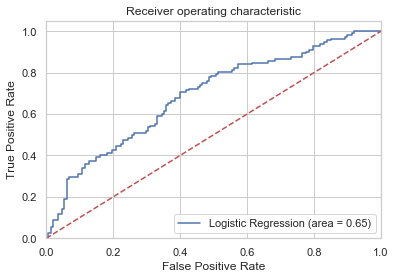

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype(float), logreg.predict(X_test).astype(float))  
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [39]:
y_test.replace({True: '1', False: '0'}, inplace=True)

In [40]:
import pickle

# save the model to disk
filename = 'hit_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [41]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6423076923076924


In [42]:
features = cols
features

['acousticness',
 'danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'tempo']

## Predicting Kidi's "Say Cheese"  

In [43]:
loaded_model = pickle.load(open(filename, 'rb'))

In [44]:
#The audio features of the song is below

{"acousticness": 0.419,
                   "danceability": 0.837,
                   "instrumentalness": 0.0000977,
                   "liveness": 0.103,
                   "loudness": -5.014,
                   "speechiness": 0.0505,
                   "valence": 0.876,
                   "tempo": 102.996}

parameters = [[0.419,0.837,0.0000977,0.103,-5.014,0.0505,0.876,102.996]]

In [47]:
print(loaded_model.predict(parameters))

['1']
